<a href="https://colab.research.google.com/github/Ashish8135/MLProject/blob/master/EcommerceCustomer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import necessary library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [9]:
from google.colab import files
files.upload()

Saving EcommerceCustomers.sql to EcommerceCustomers.sql


{'EcommerceCustomers.sql': b'Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent\nmstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.49726772511229,12.655651149166752,39.57766801952616,4.082620632952961,587.9510539684005\nhduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272026360156,11.109460728682564,37.268958868297744,2.66403418213262,392.2049334443264\npallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, DC 99414-7564",Bisque,33.000914755642675,11.330278057777512,37.11059744212085,4.104543202376424,487.54750486747207\nriverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.30555662975554,13.717513665142508,36.72128267790313,3.1201787827480914,581.8523440352178\nmstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 37242-1057",MediumAquaMarine,33.33067252364639,12.795188551078114,37.53665330059473

In [15]:
ecom_data=pd.read_csv('EcommerceCustomers.sql')

In [16]:
ecom_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [18]:
# Here we are describing the dataset 
ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [19]:
# check null value in the dataset 
ecom_data.isnull().sum() #here we see there is no null value

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

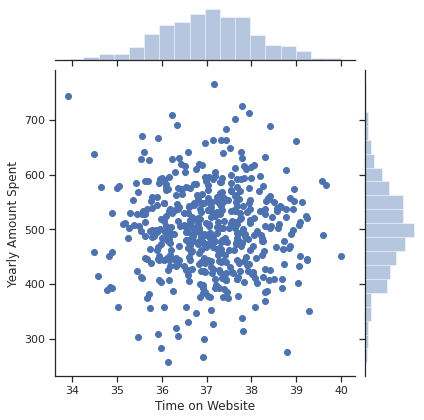

In [25]:
# sns.set(style='ticks')
# graph regarding Yearly Amount of time spent in the website
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=ecom_data) #if you want add some more functionality in the graph


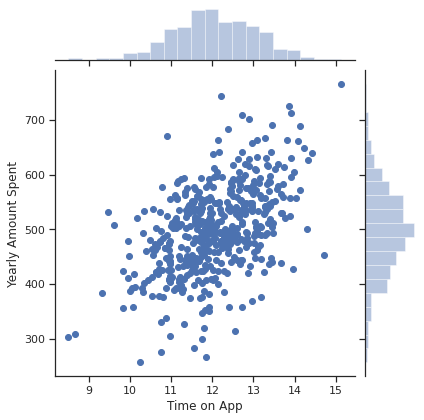

In [26]:
# graph regarding  Yearly time spent in application
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=ecom_data)

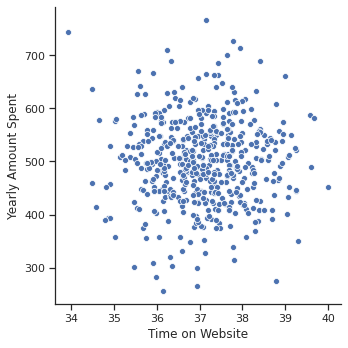

In [29]:
# Here we use relplot 
sns.relplot(x='Time on Website',y='Yearly Amount Spent',data=ecom_data)

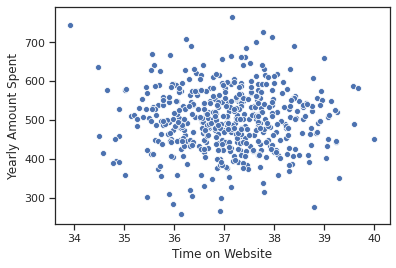

In [30]:
sns.scatterplot(x='Time on Website',y='Yearly Amount Spent',data=ecom_data)

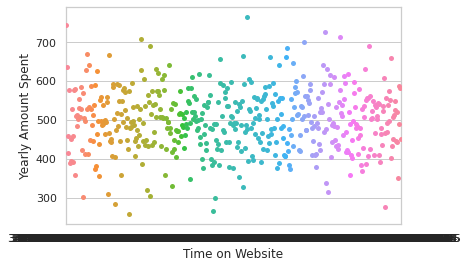

In [34]:
# sns.set(style="whitegrid", palette="muted")
sns.swarmplot(x="Time on Website", y="Yearly Amount Spent", data=ecom_data)

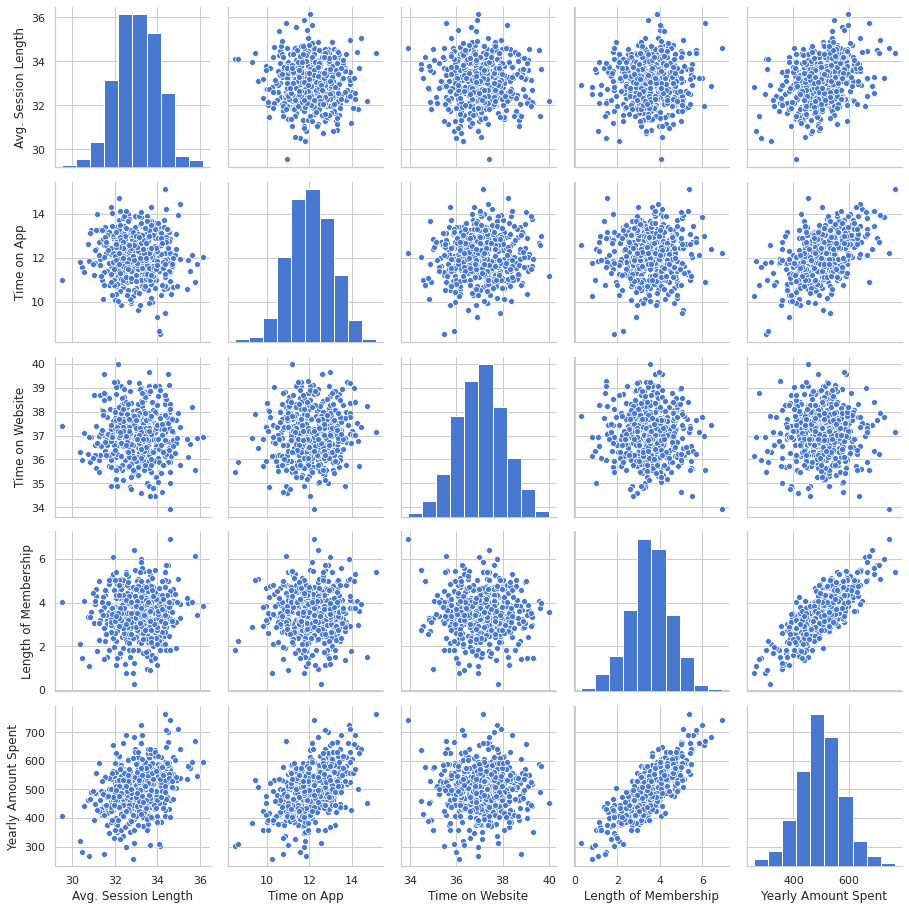

In [36]:
sns.pairplot(ecom_data)

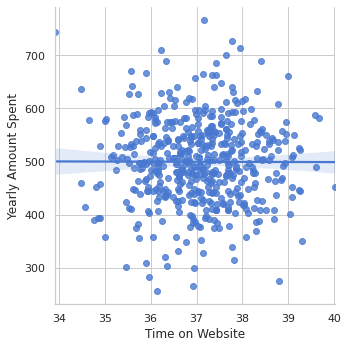

In [37]:
sns.lmplot(x="Time on Website", y="Yearly Amount Spent", data=ecom_data)

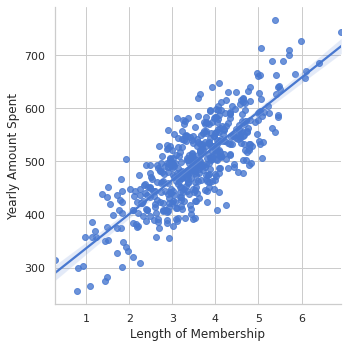

In [38]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=ecom_data)

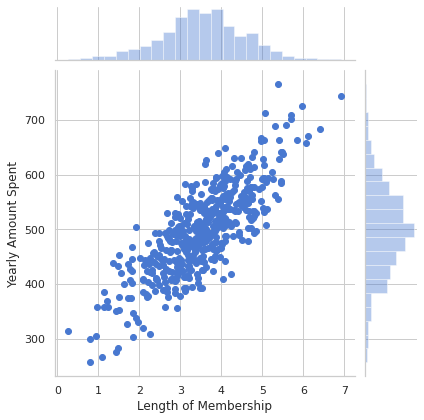

In [40]:
sns.jointplot(x="Length of Membership", y="Yearly Amount Spent", data=ecom_data)

In [41]:
# find out the column name from the dataset
ecom_data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [44]:
# we  have observed the dataset  and conclude that  what is depemdent and idependent variables.
y=ecom_data['Yearly Amount Spent'] #dependent variable
x=ecom_data[['Time on Website','Time on App','Length of Membership','Avg. Session Length']] #independent variable

Import Necessary library for model prediction of the dataset 

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
# find the coeficient
model.coef_

array([ 0.19040528, 38.59015875, 61.27909654, 25.98154972])

In [57]:
# to find the intecept
model.intercept_

-1047.9327822502391

<function matplotlib.pyplot.show>

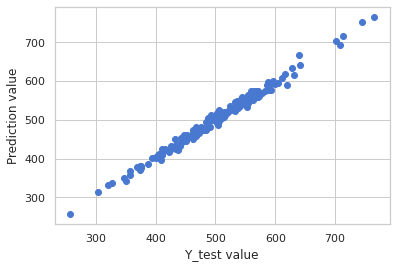

In [58]:
# Predict the model
prediction=model.predict(x_test)
plt.scatter(y_test,prediction)
plt.xlabel("Y_test value")
plt.ylabel('Prediction value')
plt.show

In [59]:
# find absolute error,root mean  square error,mean sqaure error
from sklearn import  metrics
import numpy as np

In [60]:
abs_eror=metrics.mean_absolute_error(y_test,prediction)
mean_error=metrics.mean_squared_error(y_test,prediction)
root_mean=np.sqrt(metrics.mean_squared_error(y_test,prediction))

In [61]:
print("absolute error is :",abs_eror)
print("Mean Square error  is :",mean_error)
print("Root Mean Square error is :",root_mean)

absolute error is : 7.228148653430847
Mean Square error  is : 79.81305165097471
Root Mean Square error is : 8.93381506697865


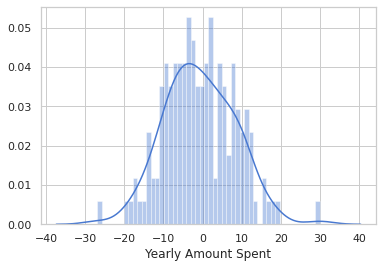

In [68]:
sns.distplot((y_test-prediction),bins=50)

In [72]:
coff_in_dataframe=pd.DataFrame(model.coef_,x.columns,columns=['coefficient'])


In [73]:
coff_in_dataframe

,coefficient
Time on Website,0.190405
Time on App,38.590159
Length of Membership,61.279097
Avg. Session Length,25.981550
